### The abbreviation KNN stands for “K-Nearest Neighbour”. It is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements. The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'K'.

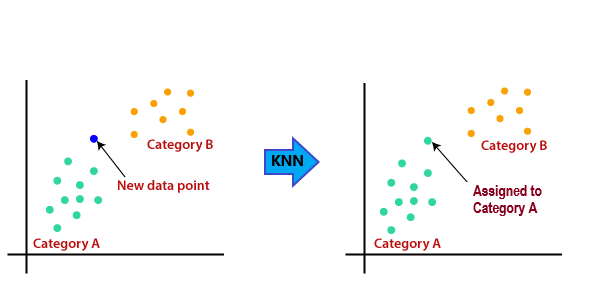


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("telescope_data.csv")
cols = df.columns
tel_data = df.rename(columns=str.lower)
ds_train, ds_test = train_test_split(tel_data, test_size=0.2)
input_ds_train = ds_train.drop(columns=["class"])
out_ds_train = ds_train["class"]

input_ds_test = ds_test.drop(columns=["class"])
out_ds_test = ds_test["class"]

# len(out_ds_train[out_ds_train["class"] == "h"])
# len(out_ds_train[out_ds_train["class"] == "g"])
len(out_ds_train[out_ds_train == 'h'])
len(out_ds_train[out_ds_train == 'g'])
# out_ds_train.columns


9819

In [3]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
# Standard scalar will ensure that each row has same level of data. previously some columns are 87, 90 and others are in decimal points.
# Now all the columns will be transformed to decimal
# input_ds_train = scalar.fit_transform(input_ds_train)

# with 'h' class ,number of records are low ,so prediction for hadron would be hard as it has less data. 
# To avoid that we do resample
r_sam = RandomOverSampler()
input_ds_train, out_ds_train = r_sam.fit_resample(input_ds_train,out_ds_train)
print(len(out_ds_train))
print(len(out_ds_train[out_ds_train == 'g']))
print(len(out_ds_train[out_ds_train == 'h']))

19638
9819
9819


In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn_model = KNeighborsClassifier(n_neighbors=1)

knn_model.fit(input_ds_train,out_ds_train)
predicted_result = knn_model.predict(input_ds_test)

accuracy_info = accuracy_score(out_ds_test,predicted_result)
accuracy_info


0.9997371188222923

In [6]:
input_ds_test

,unnamed: 0,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist
14900,14900,162.9040,44.1157,3.3998,0.2199,0.1157,-159.4090,-95.9851,-42.3085,2.6070,298.8910
2846,2846,30.8869,14.5951,2.7885,0.3938,0.2400,-9.2235,16.3410,6.2712,9.0144,120.9100
8823,8823,37.3397,20.4370,2.8907,0.2842,0.1846,32.7575,26.3113,9.0852,3.8920,139.3330
419,419,41.7450,19.7280,3.1065,0.2504,0.1475,36.2267,34.9348,11.3817,1.2137,167.0260
17833,17833,43.4086,20.6484,2.7128,0.3551,0.2338,-2.9891,37.8256,8.1397,3.7211,241.6005
...,...,...,...,...,...,...,...,...,...,...,...
6940,6940,36.4288,32.6215,3.4793,0.2149,0.1090,30.2361,23.0286,22.4956,43.6107,102.8990
6674,6674,32.6997,22.1011,2.8570,0.3572,0.2314,22.0794,19.5163,-17.7256,20.4490,153.7560
13096,13096,12.7269,11.6292,2.0881,0.7102,0.3959,15.5857,-9.1686,8.6589,35.7921,193.5800
12669,12669,37.2093,12.1956,2.6144,0.3937,0.2005,-18.2252,-31.6090,10.4884,46.1597,202.2970


In [7]:
out_ds_test

14900    h
2846     g
8823     g
419      g
17833    h
        ..
6940     g
6674     g
13096    h
12669    h
8519     g
Name: class, Length: 3804, dtype: object

In [8]:
knn_model.predict(input_ds_test.head(3))

array(['h', 'g', 'g'], dtype=object)

In [10]:
from sklearn.metrics import classification_report

print(classification_report(out_ds_test,predicted_result))

              precision    recall  f1-score   support

           g       1.00      1.00      1.00      2513
           h       1.00      1.00      1.00      1291

    accuracy                           1.00      3804
   macro avg       1.00      1.00      1.00      3804
weighted avg       1.00      1.00      1.00      3804

